# Clustering Algortihms

## K-Means 

In [21]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
85,86,Male,48,54,46
84,85,Female,21,54,57
7,8,Female,23,18,94
175,176,Female,30,88,86
129,130,Male,38,71,75
178,179,Male,59,93,14
168,169,Female,36,87,27
139,140,Female,35,74,72
68,69,Male,19,48,59


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


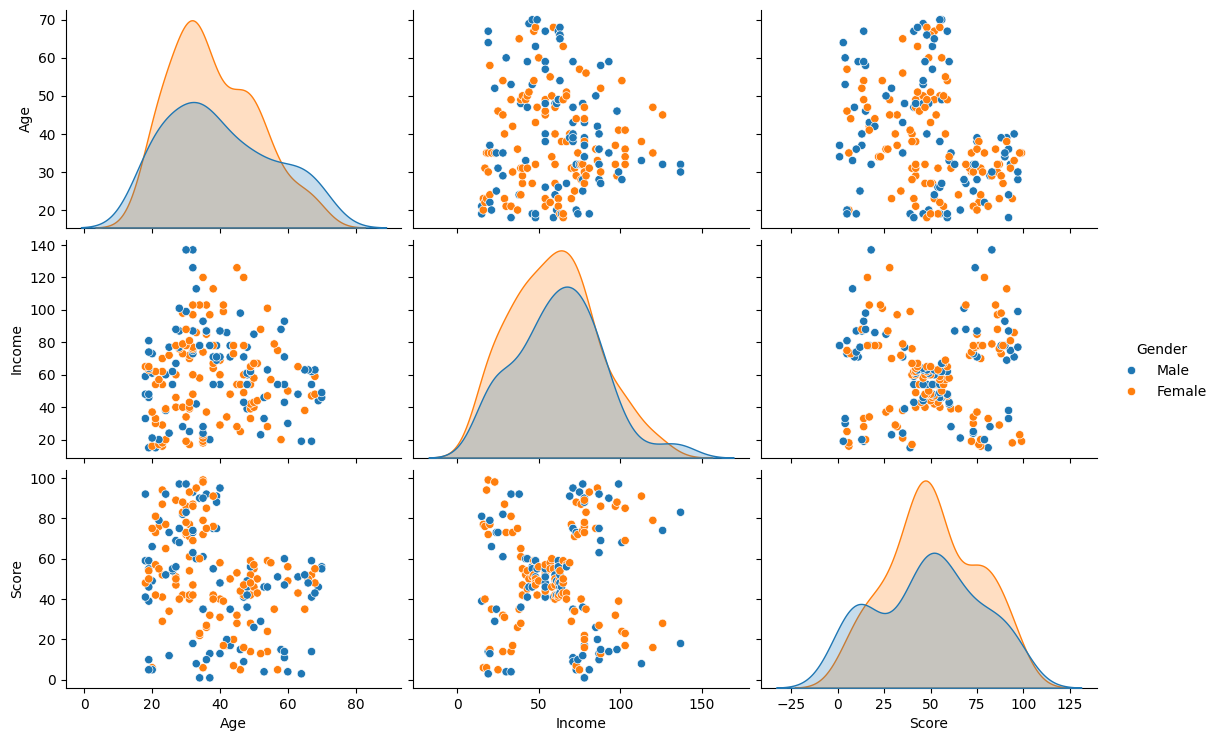

In [27]:
# Let's see our data in a detailed way with pairplot
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

From the above plot we see that gender has no direct relation to segmenting customers. That's why we can drop it and move on with other features which is why we will X parameter from now on.

In [30]:
X.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


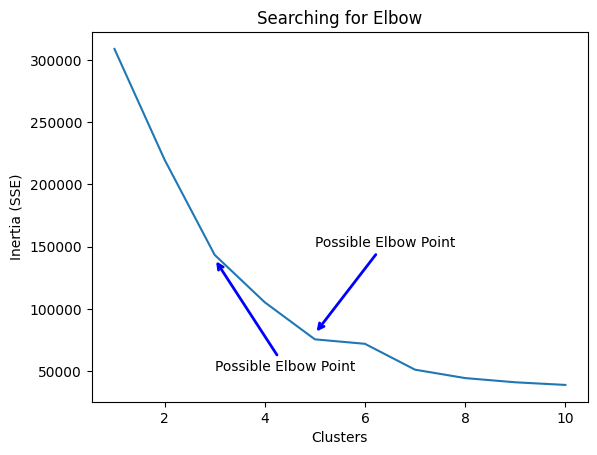

In [29]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots()
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia (SSE)')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

Elbow method tells us to select the cluster when there is a significant change in inertia. As we can see from the graph, we can say this may be either 3 or 5. Let's see both results in graph and decide.

###  Creating the Visual Plots

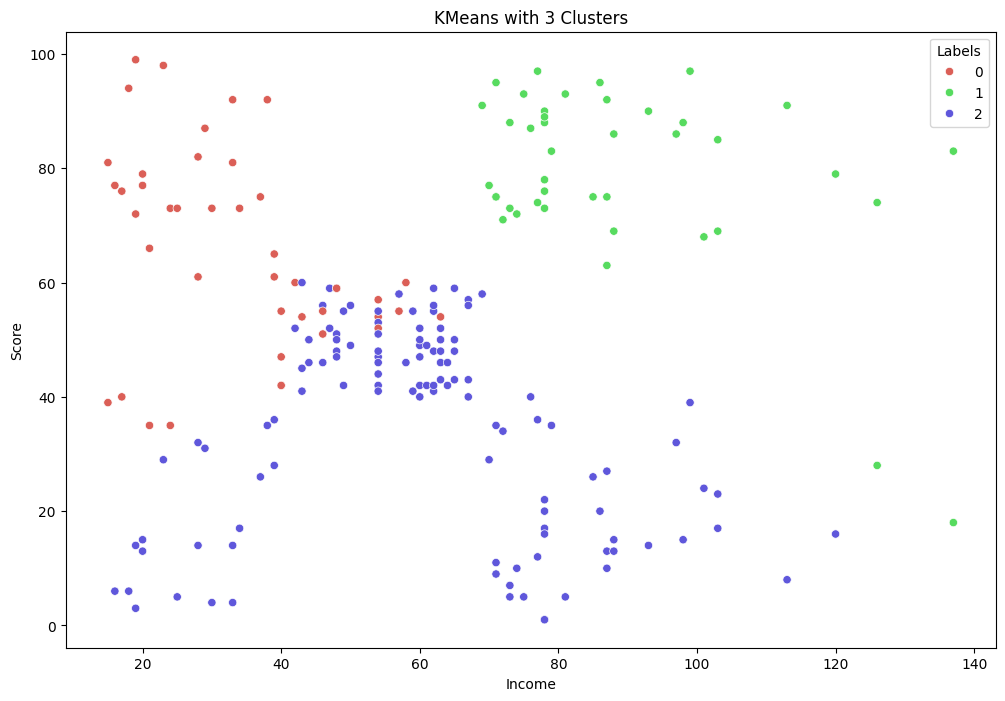

In [7]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels', palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

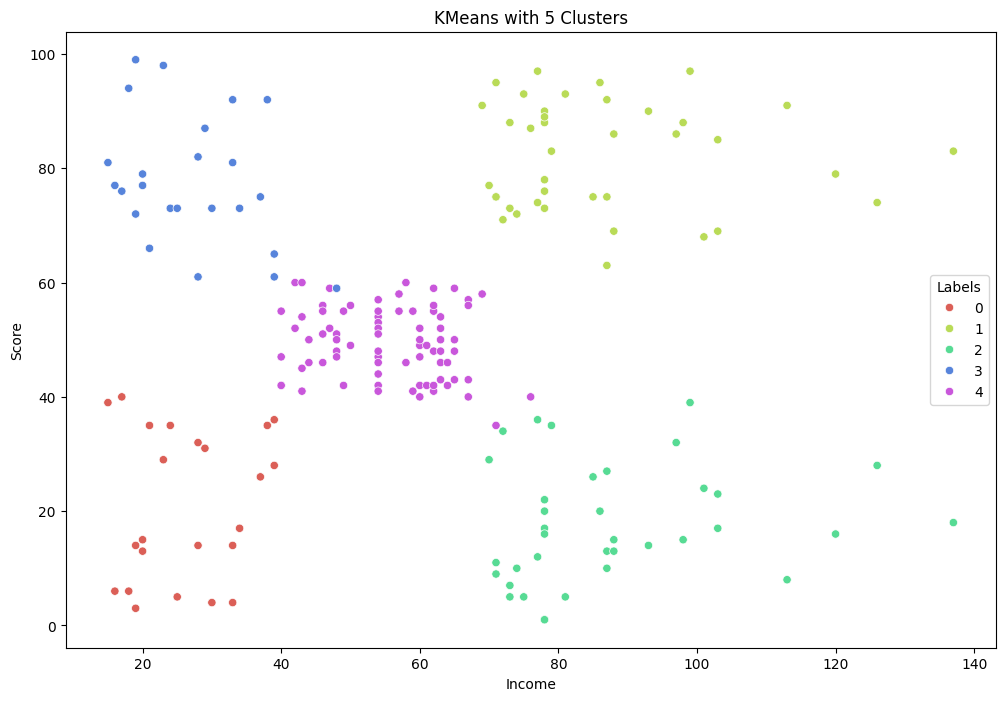

In [8]:
# Let's see with 5 Clusters
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels', palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

By judging from the plots we could say that 5 cluster seems better than the 3 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice. 

## Hierarchical Clustering

## Agglomerative

We will be looking at a clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Agglomerative is the bottom up approach which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>

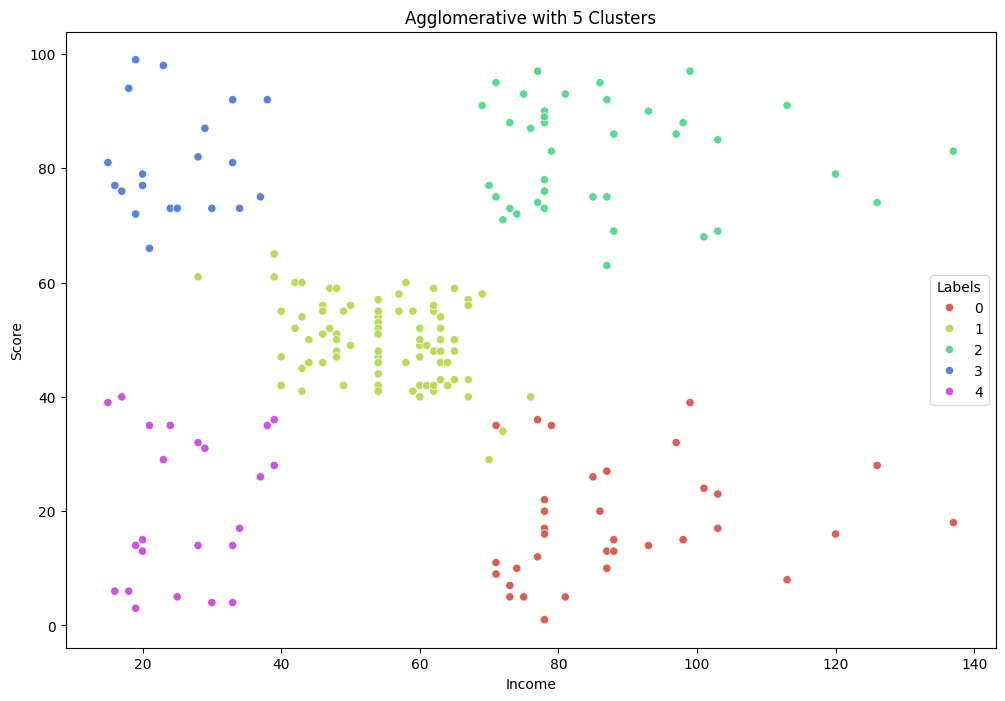

In [9]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
# sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels', palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()


### Dendrogram Associated for the Agglomerative Hierarchical Clustering
Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>. <br>
We can use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. 
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br>

In [20]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
display(dist)

array([[  0.        ,  42.05948169,  33.03028913, ..., 117.12813496,
        124.49096353, 130.17296186],
       [ 42.05948169,   0.        ,  75.01999733, ..., 111.7855089 ,
        137.76429145, 122.36829655],
       [ 33.03028913,  75.01999733,   0.        , ..., 129.89226305,
        122.20065466, 143.78456106],
       ...,
       [117.12813496, 111.7855089 , 129.89226305, ...,   0.        ,
         57.07013229,  14.35270009],
       [124.49096353, 137.76429145, 122.20065466, ...,  57.07013229,
          0.        ,  65.03076195],
       [130.17296186, 122.36829655, 143.78456106, ...,  14.35270009,
         65.03076195,   0.        ]])

Using the <b> linkage </b> class from hierarchy, pass in the parameters:
<ul>
    <li> The distance matrix </li>
    <li> 'complete' for complete linkage </li>
</ul>

In [11]:
Z = hierarchy.linkage(dist, 'complete')

A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell.

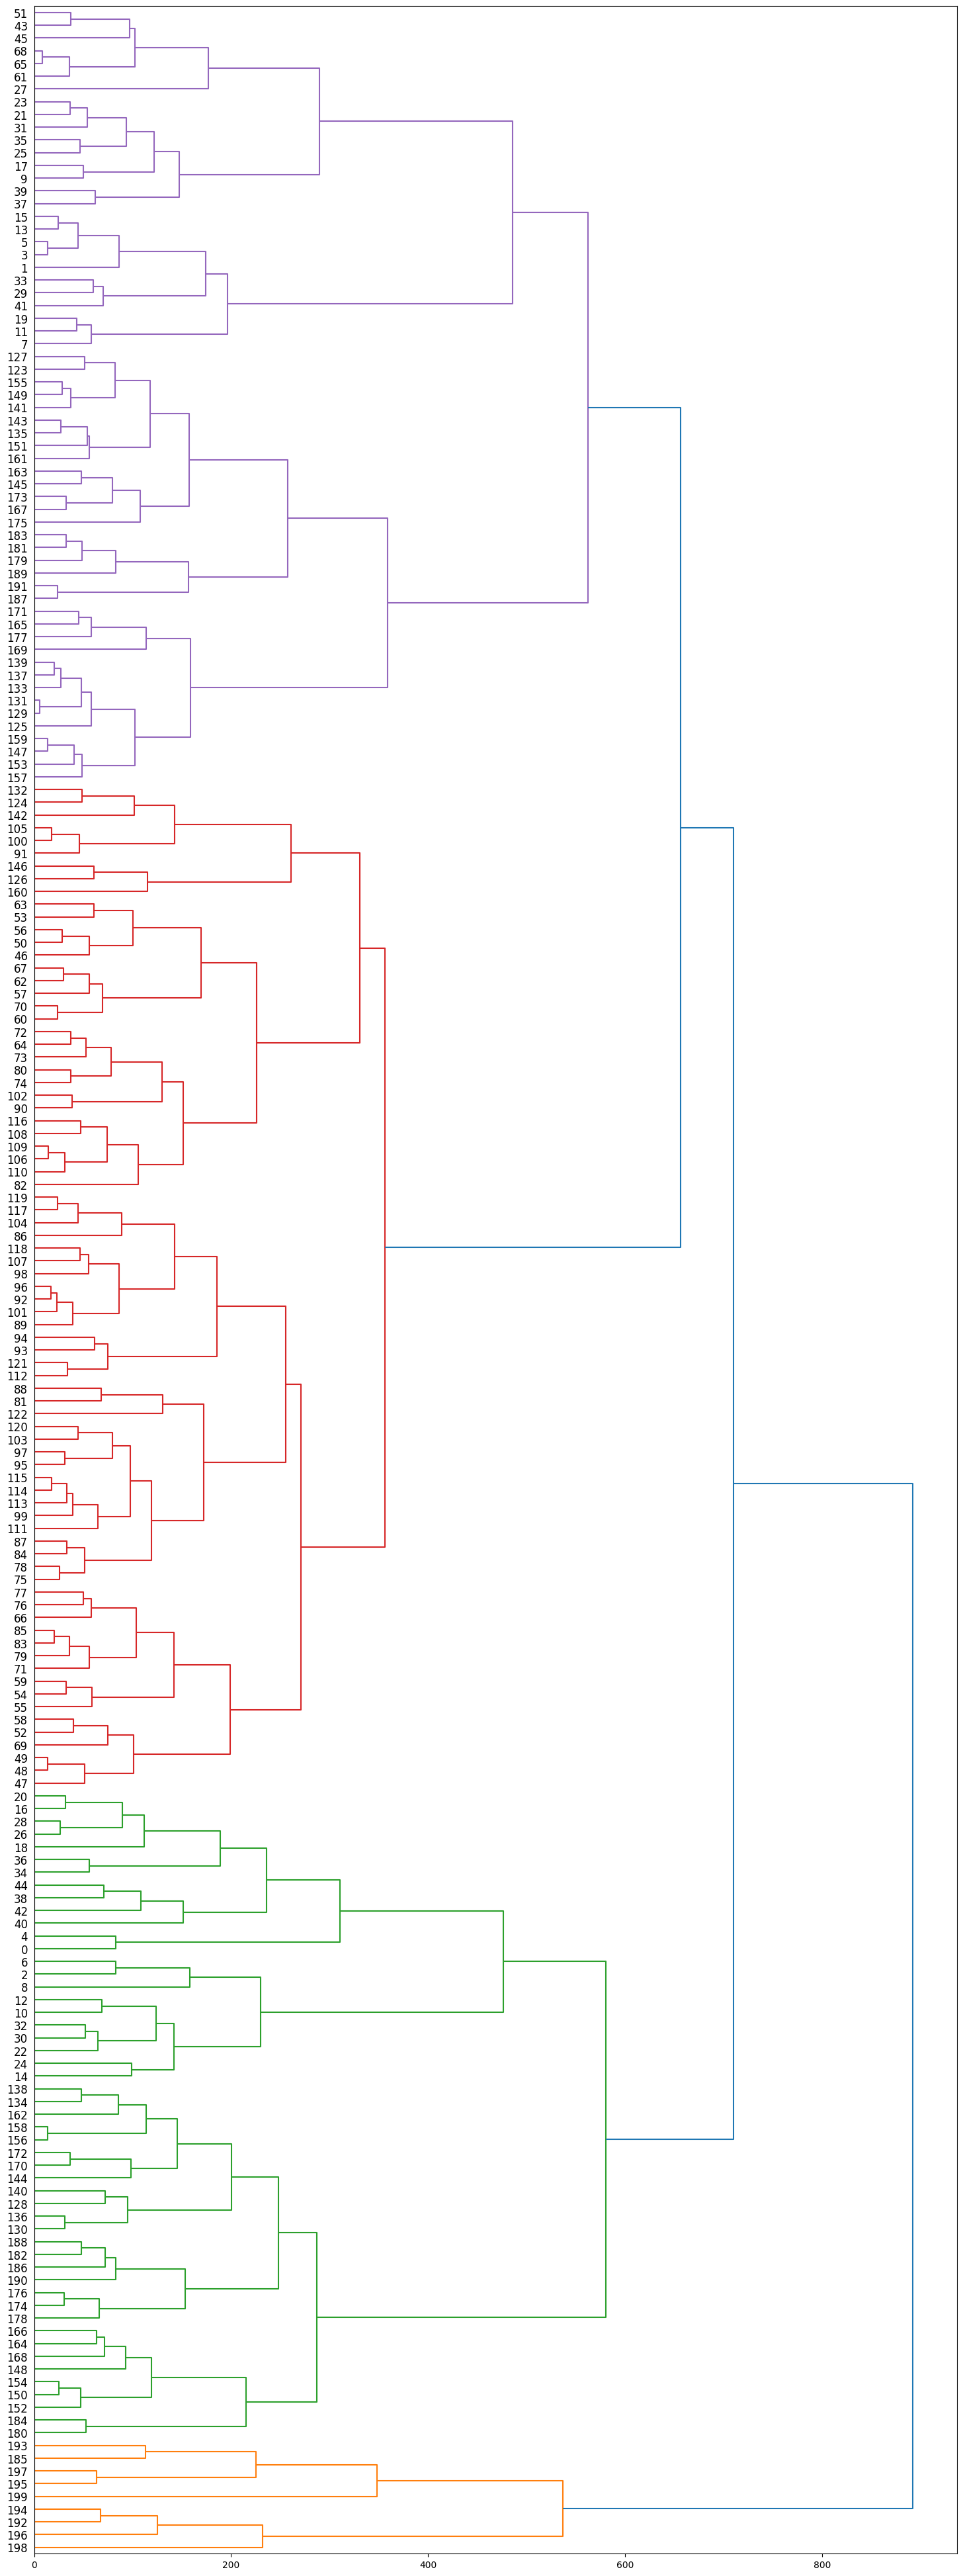

In [12]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')
plt.show()

We used __complete__ linkage for our case, let's change it to __average__ linkage to see how the dendogram changes.

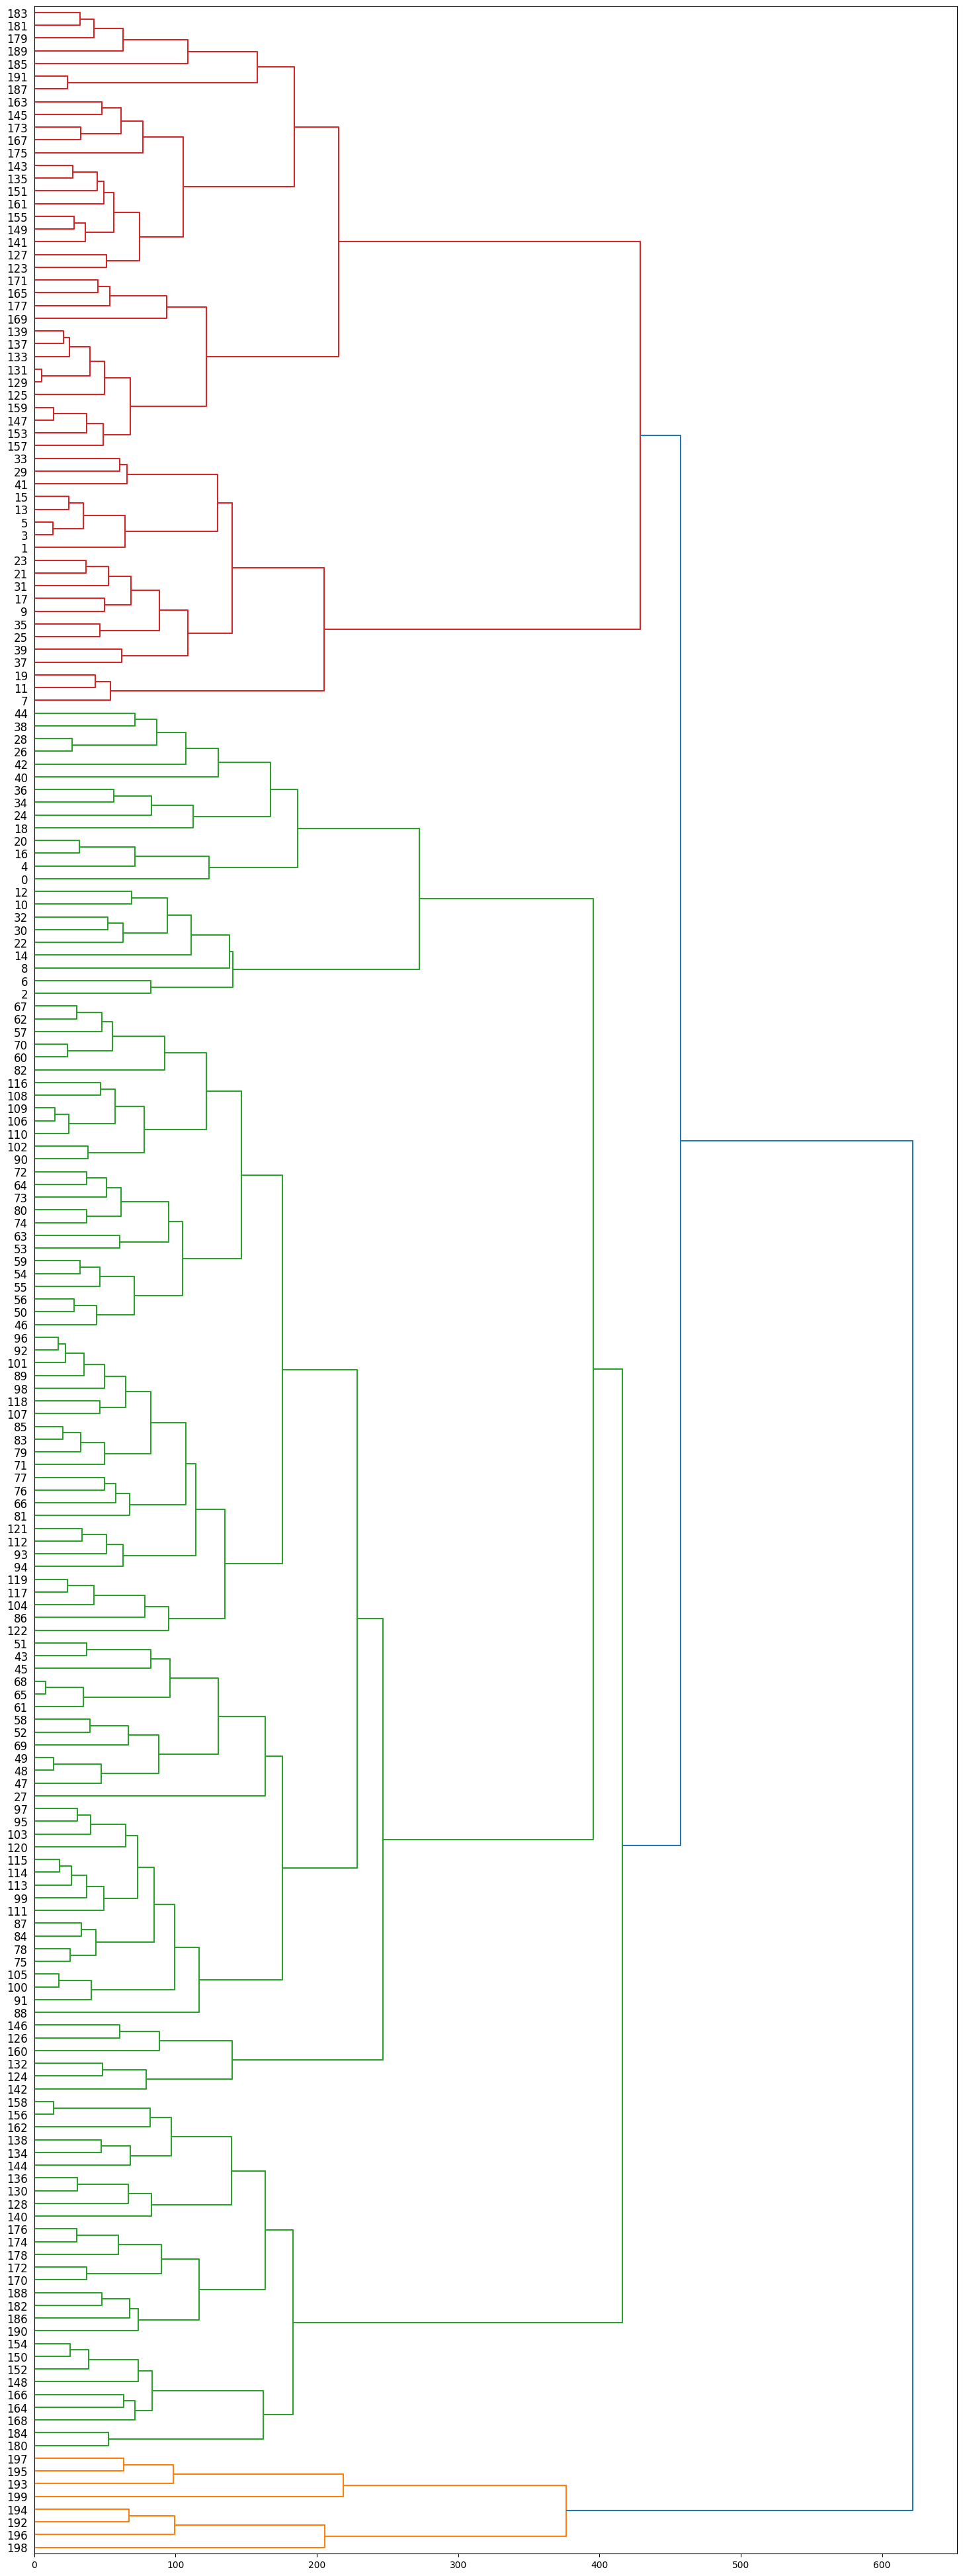

In [31]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')
plt.show()

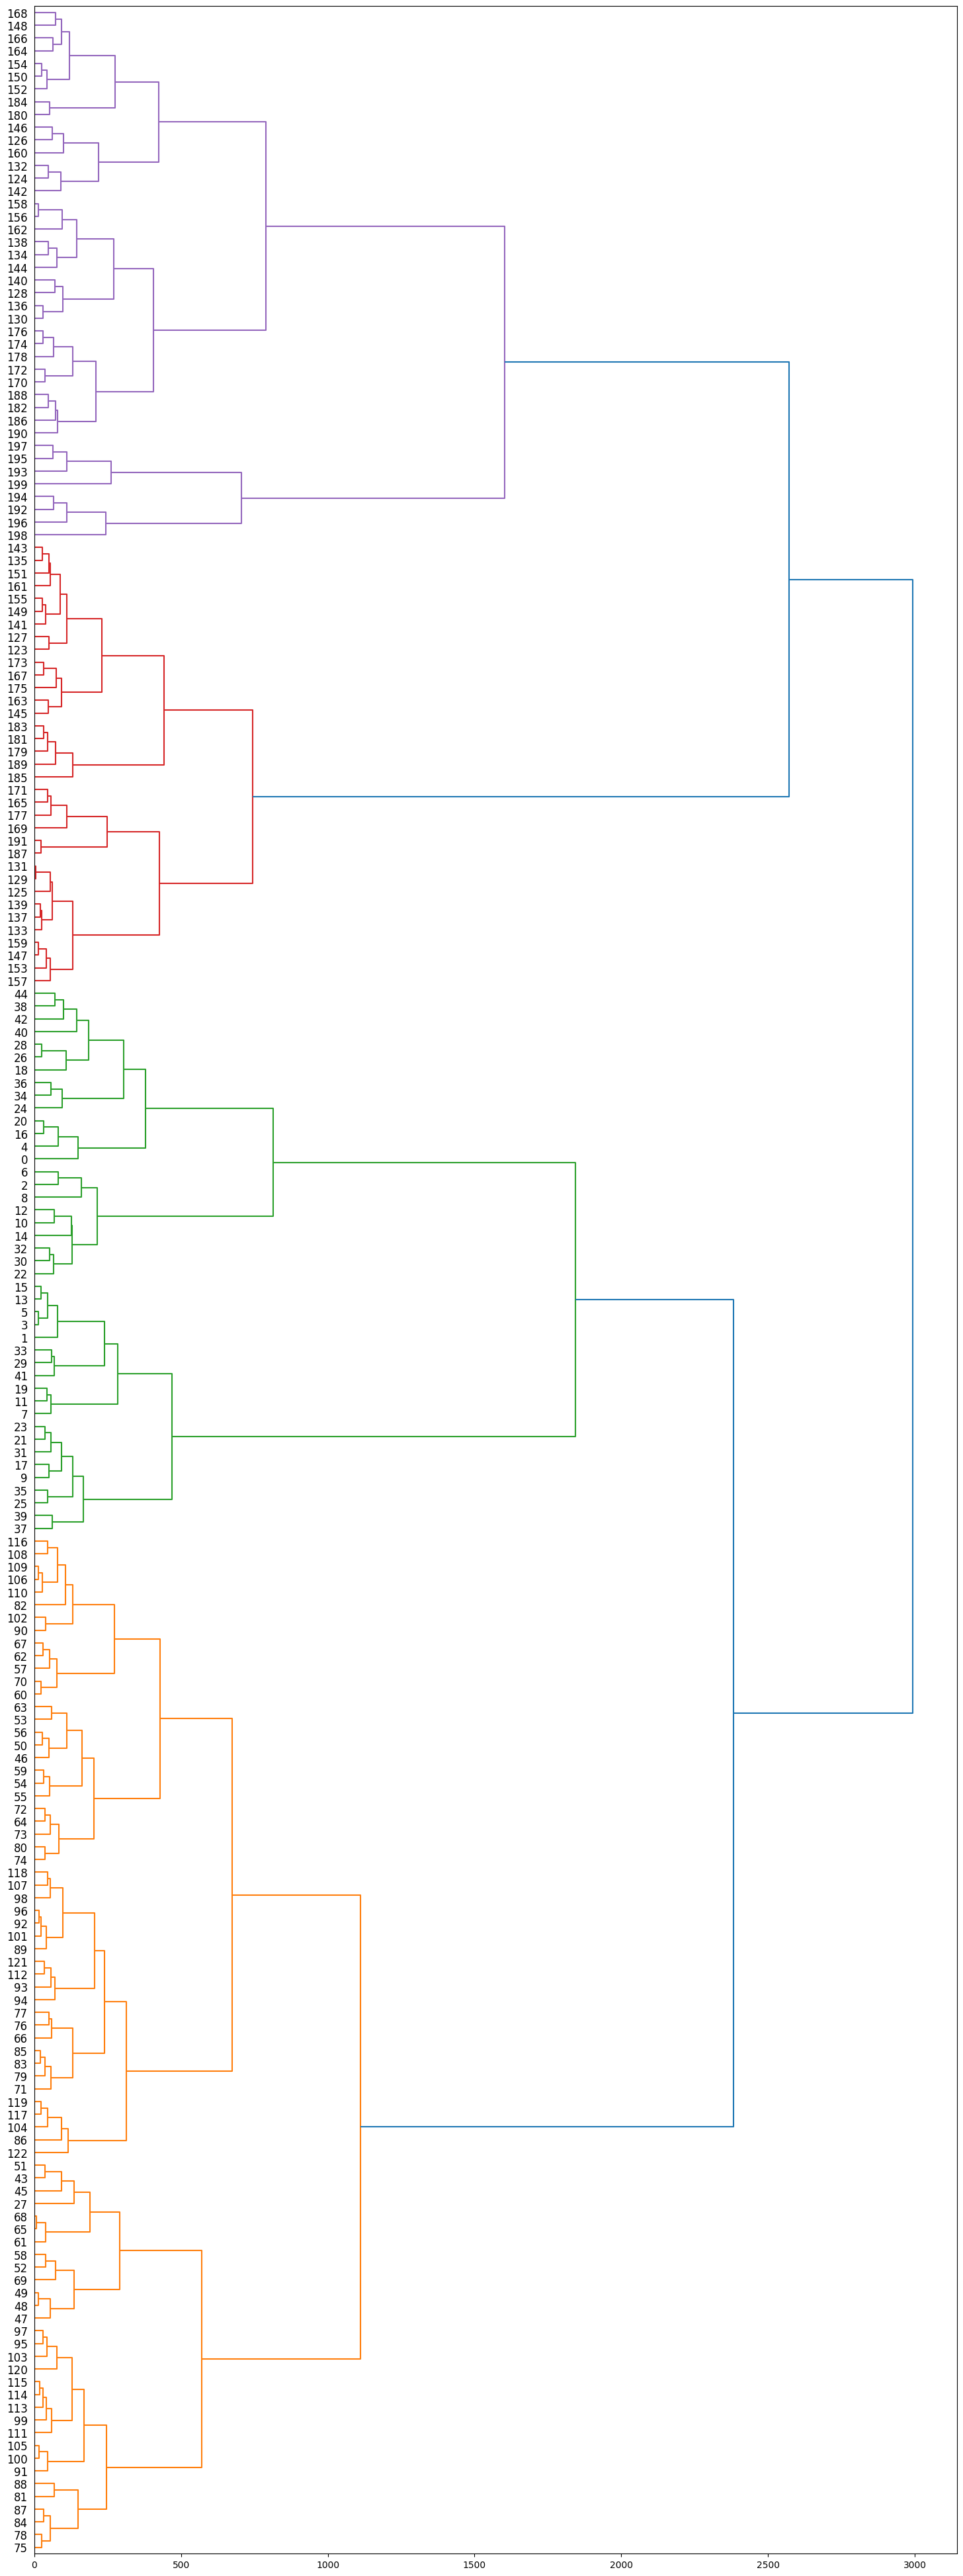

In [32]:
Z = hierarchy.linkage(dist, 'ward')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')
plt.show()

In [33]:
from scipy.cluster.hierarchy import fcluster

# Choose the number of clusters you want, for example, 3 clusters
num_clusters = 3
labels = fcluster(Z, num_clusters, criterion='maxclust')

# Adding the cluster labels to your DataFrame (assuming X is your original data)
X['AglomerativeCluster'] = labels

In [34]:
X

,Age,Income,Score,AglomerativeCluster
0,19,15,39,1
1,21,15,81,1
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,3
196,45,126,28,3
197,32,126,74,3
198,32,137,18,3


## Density Based Clustering (DBSCAN)

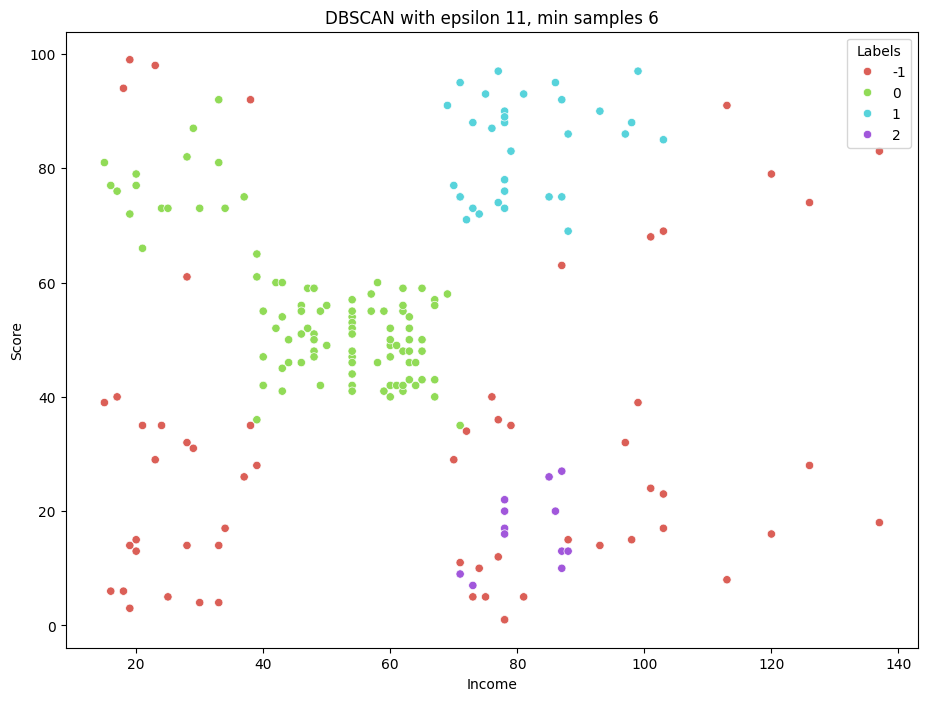

In [37]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=12, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(11, 8))
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels', palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()
